In [1]:
'''
@Author: Bohan Xu
@Date: 03/April/2023
'''
# from __future__ import annotations
# class Node:
#     def __init__(self, degree):
#         self.degree = degree
#         self.parent: Node = None
#         self.keys = list()
#         self.values = list()
    
#     def split(self) -> Node:
#         mid = int(self.degree // 2)
#         left = Node(self.degree)
#         right = Node(self.degree)
        
#         left.parent = self
#         right.parent = self
#         left.keys = self.keys[:mid]
#         left.value = self.values[:mid+1]
#         right.keys = self.keys[mid+1:]
#         right.values = self.values[mid+1:]
        
#         self.values = [left, right]
#         self.keys = [self.keys[mid]]
        
#         for child in left.values:
#             if isinstance(child, Node):
#                 child.parent = left
#         for child in right.values:
#             if isinstance(child, Node):
#                 child.parent = right
#         return self

#     @property
#     def size(self):
#         return len(self.keys)
    
#     @property
#     def getKeySize(self):
#         return len(self.keys)
    
#     @property
#     def getValueSize(self):
#         return len(self.values)
    
#     @property
#     def isKeyEmpty(self):
#         return len(self.keys) == 0
    
#     @property
#     def isValueEmpty(self):
#         return len(self.values) == 0
    
#     @property
#     def isKeyFull(self):
#         return len(self.keys) == self.degree - 1
    
#     @property
#     def isValueFull(self):
#         return len(self.values) == self.degree 
    
#     @property
#     def isOneKeyLeft(self) -> bool:
#         return len(self.keys) <= int(self.degree // 2)

#     @property
#     def reachLimit(self) -> bool:
#         return len(self.keys) <= int(self.degree // 2) - 1

#     @property
#     def isRoot(self) -> bool:
#         return self.parent is None


# class LeafNode(Node):
#     def __init__(self, degree):
#         super().__init__(degree)
#         self.prev: LeafNode = None
#         self.next: LeafNode = None
    
#     def insert(self, key, value) -> int:
#         # return {int} for calculating
#         # the number of keys
#         if not self.keys:
#             # if node is not exist
#             self.keys.append(key)
#             self.values.append([value])
#             return 1
#         for idx,key_val in enumerate(self.keys):
#             # if key is the same, the value will append the value
#             if key == key_val:
#                 # use List to store the timestamp here
#                 self.values[idx].append(value)
#                 return 0
            
#             # add it in front of key_val
#             elif key < key_val:
#                 self.keys = self.keys[:idx] + [key] + self.keys[idx:]
#                 self.values = self.values[:idx] + [[value]] + self.values[idx:]
#                 return 1
#             # if key is not found, add it to the last position
#             elif idx + 1 == self.size:
#                 self.keys.append(key)
#                 self.values.append([value])
#                 return 1
    
#     def split(self) ->Node:
#         # self euqals left LeafNode
#         # LeafNode looks like creating the linked list
#         mid = int(self.degree // 2)
#         top = Node(self.degree)
#         right = LeafNode(self.degree)
#         self.parent = top
#         right.parent = top
        
#         right.keys = self.keys[mid:]
#         right.values = self.values[mid:]
#         right.prev = self
#         right.next = self.next
        
#         top.keys = [right.keys[0]]
#         top.values = [self, right]

#         self.keys = self.keys[:mid]
#         self.values = self.values[:mid]
#         self.next = right
#         return top
        
# class BPTree(object):
#     # default value could be larger
#     def __init__(self, degree=9):
#         # root should be LeafNode to store data
#         self.root: Node = LeafNode(degree)
#         self.degree = degree
#         self.__count_keys = 0
    
#     def _find(self,node: Node, key):
#         for idx,key_val in enumerate(node.keys):
#             if key < key_val:
#                 return node.values[idx],idx
#             elif idx+1 == node.size:
#                 return node.values[idx+1], idx+1
    
#     def __str__(self):
#         node = self.head_leafnode
#         if not node:
#             return None

#         temp = ''
#         while node:
#             for i in range(node.getValueSize):
#                 temp += str(node.values[i]) + ' -> '
#             node = node.next
#         return 'Value List: '+temp +'END'
        
    
#     def insert(self, key, value):
#         node = self.root

#         while not isinstance(node, LeafNode):
#             node, _ = self._find(node, key)

#         self.__count_keys += node.insert(key, value)
#         while node.size == node.degree:  
#             if not node.isRoot:
#                 parent = node.parent
#                 node = node.split()  
#                 _, idx = self._find(parent, node.keys[0])
                
#                 parent.values.pop(idx)
#                 pivot = node.keys[0]

#                 for node_val in node.values:
#                     if isinstance(node_val, Node):
#                         node_val.parent = parent

#                 for idx, par_val in enumerate(parent.keys):
#                     if pivot < par_val:
#                         parent.keys = parent.keys[:idx] + [pivot] + parent.keys[idx:]
#                         parent.values = parent.values[:idx] + node.values + parent.values[idx:]
#                         break

#                     elif idx + 1 == parent.size:
#                         parent.keys += [pivot]
#                         parent.values += node.values
#                         break                 
#                 node = parent
#             else:
#                 node = node.split()  
#                 self.root = node

#     def search(self, key):
#         node = self.root

#         while not isinstance(node, LeafNode):
#             node, _ = self._find(node, key)

#         for idx, key_val in enumerate(node.keys):
#             if key == key_val:
#                 return node.values[idx]
#         return None
    
#     def clear(self):
#         self.root: Node = LeafNode(self.degree)
#         self.__count_keys = 0
    
#     @property
#     def count_keys(self):
#         return self.__count_keys
        
    
#     @property
#     def head_leafnode(self):
#         if not self.root:
#             return None

#         node = self.root
#         while not isinstance(node, LeafNode):
#             node = node.values[0]

#         return node
    
#     @property
#     def end_leafnode(self):
#         if not self.root:
#             return None

#         node = self.root
#         while not isinstance(node, LeafNode):
#             node = node.values[-1]
            
#         return node
from __future__ import annotations
'''
@author: Bohan Xu
'''
class Node:
    def __init__(self, order):
        self.order:int = order
        self.parent: Node = None
        self.keys = list()
        self.values = list()

    def split(self) -> Node:
        mid:int = self.order // 2
        left = Node(self.order)
        right = Node(self.order)
        
        left.parent = self
        right.parent = self
        
        left.keys = self.keys[:mid]
        left.values = self.values[:mid+1]
        right.keys = self.keys[mid+1:]
        right.values = self.values[mid+1:]
        
        self.values = [left, right]
        self.keys = [self.keys[mid]]
        
        for child in left.values:
            if isinstance(child, Node):
                child.parent = left
        for child in right.values:
            if isinstance(child, Node):
                child.parent = right
        return self
    
    @property
    def size(self)-> int:
        return len(self.keys)
    
    @property
    def getKeySize(self)-> int:
        return len(self.keys)
    
    @property
    def getValueSize(self)-> int:
        return len(self.values)
    
    @property
    def isKeyEmpty(self)-> bool:
        return len(self.keys) == 0
    
    @property
    def isValueEmpty(self)-> bool:
        return len(self.values) == 0
    
    @property
    def isKeyFull(self) -> bool:
        return len(self.keys) == self.order - 1
    
    @property
    def isValueFull(self) -> bool:
        return len(self.values) == self.order 
    
    @property
    def isOneKeyLeft(self) -> bool:
        return len(self.keys) <= int(self.order // 2)

    @property
    def reachLimit(self) -> bool:
        return len(self.keys) <= int(self.order // 2) - 1

    @property
    def isRoot(self) -> bool:
        return self.parent is None


class LeafNode(Node):
    def __init__(self, order):
        super().__init__(order)
        self.prev: LeafNode = None
        self.next: LeafNode = None
    
    def insert(self, key, value):
        # return {int} for calculating
        # the number of keys
        if not self.keys:
            # if node is not exist
            self.keys.append(key)
            self.values.append([value])
            return 1
        for idx,key_val in enumerate(self.keys):
            # if key is the same, the value will append the value
            if key == key_val:
                # use List to store the timestamp here
                self.values[idx].append(value)
                return 0
            
            # add it in front of key_val
            elif key < key_val:
                self.keys = self.keys[:idx] + [key] + self.keys[idx:]
                self.values = self.values[:idx] + [[value]] + self.values[idx:]
                return 1
            # if key is not found, add it to the last position
            elif idx + 1 == self.size:
                self.keys.append(key)
                self.values.append([value])
                return 1
    
    def split(self) ->Node:
        # self == left LeafNode
        # LeafNode looks like
        # creating linked list
        mid:int = self.order // 2
        top = Node(self.order)
        right = LeafNode(self.order)
        self.parent = top
        right.parent = top
        right.keys = self.keys[mid:]
        right.values = self.values[mid:]
        right.prev = self
        right.next = self.next
        
        top.keys = [right.keys[0]]
        top.values = [self, right]

        self.keys = self.keys[:mid]
        self.values = self.values[:mid]
        self.next = right
        return top
        
class BPTree(object):
    # default value could be larger
    def __init__(self, order=9):
        # root should be LeafNode to store data
        self.root: Node = LeafNode(order)
        self.order: int = order
        self.__count_keys: int = 0
        self.op_times: int = 0
    
    def __str__(self):
        node = self.head_leafnode
        if not node:
            return None

        temp = ''
        while node:
            for i in range(node.getValueSize):
                temp += str(node.values[i]) + ' -> '
            node = node.next
        return 'Value List: '+temp +'END'
        
    
    def insert(self, key, value):
        node = self.root
        while not isinstance(node, LeafNode):
            node, idx = self.__inner_check(node, key)

        self.__count_keys += node.insert(key, value)
        self.op_times += 1
        while node.size == node.order:  
            if not node.isRoot:
                parent = node.parent
                node = node.split()  
                _, idx = self.__inner_check(parent, node.keys[0])
                
                parent.values.pop(idx)
                headnode = node.keys[0]

                for node_val in node.values:
                    if isinstance(node_val, Node):
                        node_val.parent = parent

                for idx, par_val in enumerate(parent.keys):
                    if headnode < par_val:
                        parent.keys.insert(idx, headnode)
                        # parent.keys = parent.keys[:idx] + [headnode] + parent.keys[idx:]
                        parent.values = parent.values[:idx] + node.values + parent.values[idx:]
                        break

                    elif idx + 1 == parent.size:
                        parent.keys.append(headnode)
                        parent.values.extend(node.values)
                        break   
                node = parent
            else:
                node = node.split()  
                self.root = node

    def __inner_check(self,node: Node, key):
        for idx,key_val in enumerate(node.keys):
            if key < key_val:
                return (node.values[idx],idx)
            elif idx+1 == node.size:
                return (node.values[idx+1], idx+1)

    def search(self, key):
        node = self.root

        while not isinstance(node, LeafNode):
            node, _ = self.__inner_check(node, key)

        for idx, key_val in enumerate(node.keys):
            if key == key_val:
                return node.values[idx]
        return None
    
    @property
    def count_keys(self):
        return self.__count_keys
        
    @property
    def head_leafnode(self):
        if not self.root:
            return None

        node = self.root
        while not isinstance(node, LeafNode):
            node = node.values[0]

        return node

In [13]:
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.linear_model import LogisticRegression
from torch_cluster import random_walk

import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import NeighborSampler as RawNeighborSampler
from torch_geometric.nn import SAGEConv

# import from glzip
from glzip import CSR, GraphSageSampler
import datetime
import argparse
import pandas as pd
import numpy as np
from pympler.asizeof import asizeof
c = datetime.datetime.now()
# EPS = 1e-15

# path = osp.join(args.root, dataset)
# dataset = Planetoid(path, dataset, transform=T.NormalizeFeatures())

available_datasets = [
        'sx-superuser.txt',
        'sx-askubuntu.txt',
        'sx-mathoverflow.txt',
        'email-Eu-core-temporal.txt',
        'CollegeMsg.txt',
        'sx-stackoverflow.txt'
]


# fn =  available_datasets[4]
# dt = pd.read_csv(os.path.join(os.path.abspath('.')+'/dataset', fn), header=None, sep = ' ')

In [38]:
from glzip import CSR
import pandas as pd
import os
import numpy as np
from collections import defaultdict
import random
 
'''
@Author: Bohan Xu
@Date: 03/April/2023
'''

# v official PyG torch_geometric.loader.neighbor_sampler
# edge_index class, not sampler....
from typing import Callable, List, NamedTuple, Optional, Tuple, Union
import torch
from torch import Tensor
from torch_geometric.typing import SparseTensor

class Adj(NamedTuple):
    edge_index: torch.Tensor
    e_id: torch.Tensor
    size: torch.Tensor

    def to(self, *args, **kwargs):
        return Adj(self.edge_index.to(*args, **kwargs),
                   self.e_id.to(*args, **kwargs), self.size)

# ^ official PyG torch_geometric.loader.neighbor_sampler


class TimeDataLoaderAndSampler:
    def __init__(self, order):
        self.data = None
        self.csr = None
        self.bpt = BPTree(order=order)


    def process(self, addr = 'sx-stackoverflow.txt'):
        print('This step may consume a little bit time')
        self.data = pd.read_csv(os.path.join(os.path.abspath('.')+'/dataset', addr), header=None, sep = ' ')
        print('Done pd.read_csv')
        self.data = self.data.rename(columns = {0:'source', 1:'target', 2:'timestamp'})
        bptins = self.bpt.insert
        i: int = 100000
        self.csr = CSR(edge_index=torch.tensor([self.data['source'][:i],self.data['target'][:i]], dtype=torch.long))
        print('Done Graph Compression')
        a = map(lambda x,y,z : bptins((x,y), z),self.data['source'][:i],self.data['target'][:i],self.data['timestamp'][:i])
        list(a)
        print('Done Creating Index')


    # def time_range_sampler(self, source, time_range, nums):
    #     if (self.data is None) or (self.csr is None):
    #         print('Please process data first')
    #         return None

    #     possible_edge = list()
    #     for num_layer in nums:
    #         get_neighbour = self.csr.neighbors(source)

    #         pass 
        
    #     pass
    
    # def _rec_nodes(self, record,source, nums, iter_times):
    #     if left == []:
    #         return record
    #     else:
    #         ngb = self.neighbors(source.pop(0))
    #         edge_list = list(map(lambda x,y: (x,y), [source]*len(nbg), nbg))
            
    #         return self._rec_nodes(record+ edge_list,source+ngb)
    
    # using python rewrite code from jake, not using muti-thread
    def __reindex(self, inputs, outputs, output_counts):
        if inputs == [] or outputs == [] or output_counts == []:
            raise Exception('None value detected')
        out_map = defaultdict(int)
        frontier = []
        n_id = 0

        for input_val in inputs:
            out_map[input_val] = n_id
            n_id += 1
            frontier.append(input_val)

        for output in outputs:
            if output not in out_map:
                out_map[output] = n_id
                n_id += 1
                frontier.append(output)

        row_idx = []
        col_idx = []
        cnt = 0

        for i, input_val in enumerate(inputs):
            idx = out_map[input_val]
            for _ in range(output_counts[i]):
                row_idx.append(idx)
                col_idx.append(out_map[outputs[cnt]])
                cnt += 1

        return frontier, row_idx, col_idx

    def __reservior_sampling(self, inputs, k):
        res = []

        if len(inputs) <= k:
            res = inputs

        if len(inputs) > k: 
            res = inputs[:k]
            for i in range(k, len(inputs)):
                idx = random.randint(0, i)
                if idx < k:
                    res[idx] = inputs[i]
        return res

    # inspired by rust code from Jake
    def _time_sampler_kernel(self, inputs, k,timespan,sampling_strategy):
        # timespan = [min, max]
        res = ([],[])
        # print('inputs: ',inputs)
        for v in inputs:
            record = []
            # tim_rec = []
            ns = self.csr.neighbors(v)
            # user can change this sampling method
            # ns = list(np.random.choice(ns,k))
            for onode in ns:
                times =self.bpt.search((v,onode))
                if times == None:
                    continue
                for ti in times:
                    if ti >= timespan[0] and ti <= timespan[1]:
                        record.append(onode)
                        # tim_rec.append(ti) 
                        break
                    print(record)
            # user can change this sampling method
            if record != []:
                if sampling_strategy == 0:
                    record = list(np.random.choice(record,k))
                if sampling_strategy == 1:
                    record = self.__reservior_sampling(record,k)
            d = len(record)
            res = (res[0]+ record.copy(), res[1] + [d]) #, res[2]+tim_rec)
        return res

    def time_sampler(self, size, timespan, input_nodes, sampling_strategy):
        nodes = list(input_nodes)
        batch_size = len(nodes)
        adjs = []

        for k in size:
            out,cnt = self._time_sampler_kernel(nodes, k, timespan,sampling_strategy)
            print(out,cnt)
            frontier, dst, src = self.__reindex(nodes,out,cnt)
            size_val = (len(frontier), len(nodes))
            adjs = [[[src, dst], [],size_val]] + adjs
            nodes = frontier
        nodes = torch.tensor(nodes)
        adjs = [adj for adj in map(lambda x: Adj(torch.tensor(x[0]), torch.tensor(x[1]), torch.tensor(x[2])), adjs)] 
        return nodes, batch_size, adjs


In [3]:
# dt = dt.rename(columns = {0:'source', 1:'target', 2:'timestamp'})
# dt

In [4]:
# dt.duplicated(subset=["source","target"])

In [5]:
# dt[dt.duplicated(subset=["source","target"])]

In [6]:
# dv = dt['source'].values
# dtar = dt['target'].values
# dtime = dt['timestamp'].values
# temp = set()
# sv = dict()
# for i in range(min(len(dv),len(dtar),len(dtime))):
#     tt = (dv[i],dtar[i])
#     if tt in temp:
#         t1 = sv[tt]
#         t1.append(dtime[i])
#         sv[tt] = t1
#     else:
#         temp.add(tt)
#         sv[tt] = [dtime[i]]
        
# l1 = list()
# l2 = list()
# l3 = list()
# for (x,y) in sv:
#     l1.append(x)
#     l2.append(y)
#     l3.append(sv[(x,y)])

In [7]:
# print(len(l1),len(l2),len(l3))

In [8]:
# import numpy as np
# l3

In [9]:
# print('source: ',l1[1],' target: ',l2[1],' timestamp: ', l3[1])

In [11]:
# dt = dt.sort_values(by = 'source')

In [12]:
# dt[:10]

In [14]:
# dt = dt[:10]

In [15]:
# dt

In [16]:
# dt.duplicated(subset=["source","target"])

In [17]:
# import numpy as np
# edge_index = torch.tensor([dt['source'].values,dt['target'].values], dtype=torch.long)

In [18]:
# edge_index

In [19]:
# edge_index

In [20]:
# from torch_geometric.data import Data
# data = Data(edge_index=edge_index, edge_weighted=np.array(dt['timestamp'].values))

In [21]:
# data.has_self_loops()

In [22]:
# data.num_edges

In [24]:
# csr = CSR(edge_index=data.edge_index, weighted=data.edge_weighted)

In [25]:
# csr = CSR(edge_index=torch.tensor([l1[:10],l2[:10]],dtype=torch.long), weighted=torch.tensor([l3[:10]],dtype=torch.long))

In [26]:
# [l1[:10],l2[:10]]

In [27]:
# l110 = [9, 1, 13, 17, 48, 19, 13, 13, 23, 35]
# l210 = [8, 1, 1, 1, 2, 9, 23, 11, 23, 33]

In [28]:
# csr = CSR(edge_index=torch.tensor([l110,l210],dtype=torch.long))

In [29]:
# a = pd.DataFrame(l3[:10]).to_numpy()


In [30]:
# b = torch.tensor([l1[:10],l2[:10]],dtype=torch.long)


In [31]:
# tp = []
# for i in l3[:10]:
#     if len(i) <2:
#         tp.append(i[0])
#     else:
#         tp.append(i)

In [32]:
# csr = CSR(edge_index=b, weighted=tp)

In [33]:
# sv

In [34]:
# import sys

In [35]:
# sys.getsizeof(sv) /1024/1024

In [51]:
from pympler.asizeof import asizeof

In [75]:
asizeof(bpt)

7752536048

In [41]:
# dt = dt.rename(columns = {0:'source', 1:'target', 2:'timestamp'})
# time_list = []

In [72]:
record = dict()
for idx in range(6):
    addr = os.path.join(os.path.abspath('.')+'/dataset', available_datasets[idx])
    dt = pd.read_csv(addr, header=None, sep = ' ')
    dt = dt.rename(columns = {0:'source', 1:'target', 2:'timestamp'})
    record[available_datasets[idx]] = [[]]
    for i in range(3):
        data = torch.tensor([dt['source'],dt['target']], dtype=torch.long)
        start = datetime.datetime.now()
        csr = CSR(edge_index=data)
        cons = datetime.datetime.now() -start
        bpt = BPTree(order=5)
        a = map(lambda x,y,z : bpt.insert((x,y), z),dt['source'],dt['target'],dt['timestamp'])
        st = datetime.datetime.now()
        list(a)
        dff = datetime.datetime.now() - st
        record[available_datasets[idx]][0].append((cons.total_seconds(),dff.total_seconds()))
    
    record[available_datasets[idx]].append((data.element_size() * data.nelement(), csr.nbytes))
    record[available_datasets[idx]].append((asizeof(bpt), os.path.getsize(addr)))

In [73]:
record

{'sx-superuser.txt': [[(4.20013, 26.458811),
   (4.243647, 30.856153),
   (4.225941, 29.702053)],
  (23093424, 6446378),
  (187157848, 34119270)],
 'sx-askubuntu.txt': [[(1.28944, 19.788133),
   (1.228191, 17.991033),
   (1.249269, 18.531795)],
  (15430992, 5369739),
  (160992680, 22881649)],
 'sx-mathoverflow.txt': [[(0.41603, 9.058937),
   (0.425173, 7.501951),
   (0.410605, 7.572674)],
  (8104800, 1070514),
  (65730608, 10924386)],
 'email-Eu-core-temporal.txt': [[(0.9503, 1.728473),
   (0.945092, 2.929789),
   (0.947203, 2.002757)],
  (5317344, 27500),
  (14554624, 5517753)],
 'CollegeMsg.txt': [[(0.029736, 0.604444),
   (0.030477, 0.35772),
   (0.029913, 0.609938)],
  (957360, 35920),
  (5366632, 1150439)],
 'sx-stackoverflow.txt': [[(112.546449, 2179.593397),
   (114.949968, 2325.787119),
   (112.799552, 2335.91653)],
  (1015952800, 133384514),
  (7752536048, 1637847556)]}

In [81]:
for i in available_datasets:
    print(i)
    print('    Topology Compression Time: ',[record[i][0][0][0],record[i][0][1][0],record[i][0][2][0]], '  avg: ', sum([record[i][0][0][0],record[i][0][1][0],record[i][0][2][0]])/3)
    print('    Building Index Time: ',[record[i][0][0][1],record[i][0][1][1],record[i][0][2][1]], '  avg: ', sum([record[i][0][0][1],record[i][0][1][1],record[i][0][2][1]])/3)
    print('    Original Topology Size: ', record[i][1][0], '\n    Compressed Topology Size: ',record[i][1][1], ' ratio: ', record[i][1][0]/record[i][1][1])
    print('    B+ Tree Memory Consuming: ', record[i][2][0], '\n    Original File Size: ', record[i][2][1])
    print()
    

sx-superuser.txt
    Topology Compression Time:  [4.20013, 4.243647, 4.225941]   avg:  4.223239333333333
    Building Index Time:  [26.458811, 30.856153, 29.702053]   avg:  29.005672333333337
    Original Topology Size:  23093424 
    Compressed Topology Size:  6446378  ratio:  3.5823875050454688
    B+ Tree Memory Consuming:  187157848 
    Original File Size:  34119270

sx-askubuntu.txt
    Topology Compression Time:  [1.28944, 1.228191, 1.249269]   avg:  1.2556333333333332
    Building Index Time:  [19.788133, 17.991033, 18.531795]   avg:  18.770320333333334
    Original Topology Size:  15430992 
    Compressed Topology Size:  5369739  ratio:  2.8736949784710206
    B+ Tree Memory Consuming:  160992680 
    Original File Size:  22881649

sx-mathoverflow.txt
    Topology Compression Time:  [0.41603, 0.425173, 0.410605]   avg:  0.4172693333333333
    Building Index Time:  [9.058937, 7.501951, 7.572674]   avg:  8.044520666666665
    Original Topology Size:  8104800 
    Compressed Topo

In [3]:

# original_size = data.element_size() * data.nelement()
# print(fn," size: ", original_size , ' -> ' , csr.nbytes)

In [4]:
# start = datetime.datetime.now()
# for i in range(len(dt)):
#     bpt.insert((dt['source'][i],dt['target'][i]),dt['timestamp'][i])
# print('BPT time spend: ',datetime.datetime.now() -c)
# bpt = BPTree(order=5)
# a = map(lambda x,y,z : bpt.insert((x,y), z),dt['source'],dt['target'],dt['timestamp'])
# c = datetime.datetime.now()
# list(a)
# print('BPT time spend: ',datetime.datetime.now() -c)

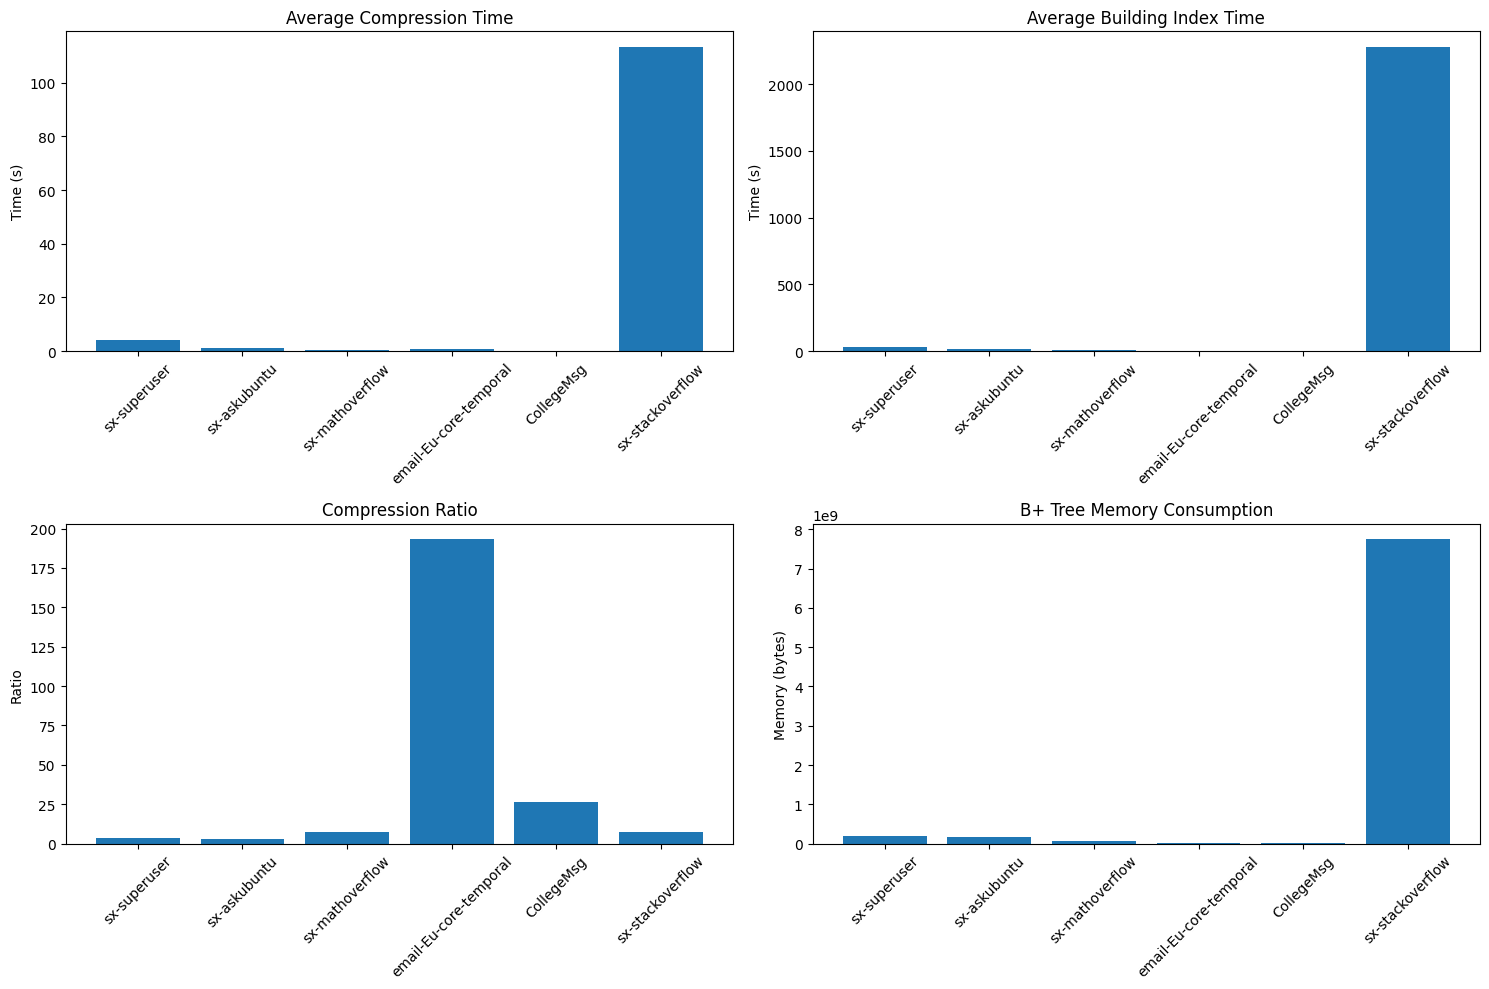

In [83]:
import matplotlib.pyplot as plt

datasets = ['sx-superuser', 'sx-askubuntu', 'sx-mathoverflow', 'email-Eu-core-temporal', 'CollegeMsg', 'sx-stackoverflow']
avg_compression_time = [4.223239333333333, 1.2556333333333332, 0.4172693333333333, 0.9475316666666668, 0.030042, 113.43198966666667]
avg_building_index_time = [29.005672333333337, 18.770320333333334, 8.044520666666665, 2.2203396666666664, 0.524034, 2280.4323486666667]
compression_ratios = [3.5823875050454688, 2.8736949784710206, 7.570942556566285, 193.35796363636365, 26.652561247216035, 7.616722283068033]
bplus_tree_memory = [187157848, 160992680, 65730608, 14554624, 5366632, 7752536048]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

axes[0].bar(datasets, avg_compression_time)
axes[0].set_title('Average Compression Time')
axes[0].set_ylabel('Time (s)')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(datasets, avg_building_index_time)
axes[1].set_title('Average Building Index Time')
axes[1].set_ylabel('Time (s)')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(datasets, compression_ratios)
axes[2].set_title('Compression Ratio')
axes[2].set_ylabel('Ratio')
axes[2].tick_params(axis='x', rotation=45)

axes[3].bar(datasets, bplus_tree_memory)
axes[3].set_title('B+ Tree Memory Consumption')
axes[3].set_ylabel('Memory (bytes)')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

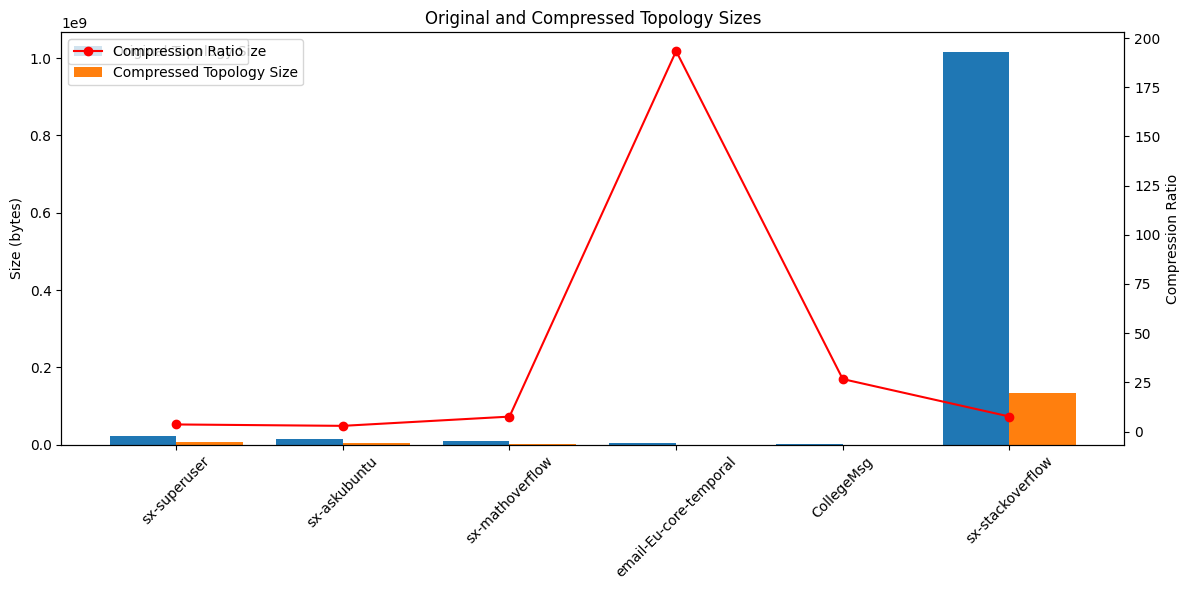

In [87]:
original_sizes = [23093424, 15430992, 8104800, 5317344, 957360, 1015952800]
compressed_sizes = [6446378, 5369739, 1070514, 27500, 35920, 133384514]

# Create an array of indices for the bar positions
indices = np.arange(len(datasets))

# Width of the bars
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart for Original and Compressed Topology Sizes
ax1.bar(indices - bar_width/2, original_sizes, bar_width, label='Original Topology Size')
ax1.bar(indices + bar_width/2, compressed_sizes, bar_width, label='Compressed Topology Size')
ax1.set_title('Original and Compressed Topology Sizes')
ax1.set_xticks(indices)
ax1.set_xticklabels(datasets, rotation=45)
ax1.set_ylabel('Size (bytes)')
ax1.legend()

# Create a secondary y-axis to plot the ratio
ax2 = ax1.twinx()
ax2.plot(indices, compression_ratios, marker='o', color='r', label='Compression Ratio')
ax2.set_ylabel('Compression Ratio')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

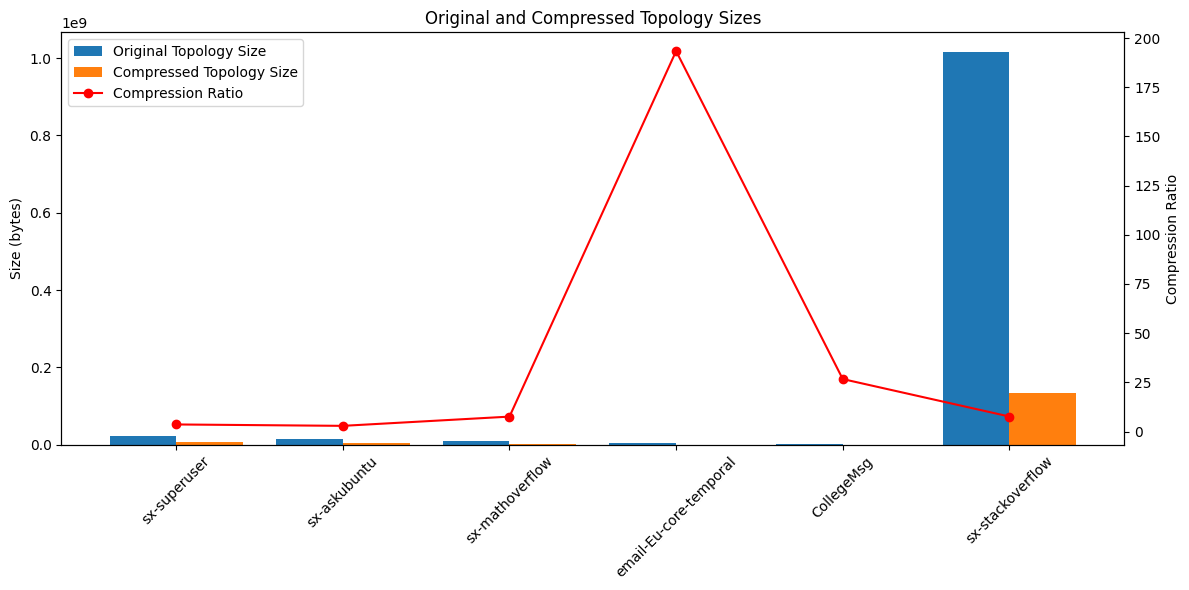

In [101]:
import numpy as np
import matplotlib.pyplot as plt

datasets = ['sx-superuser', 'sx-askubuntu', 'sx-mathoverflow', 'email-Eu-core-temporal', 'CollegeMsg', 'sx-stackoverflow']
compression_ratios = [3.5823875050454688, 2.8736949784710206, 7.570942556566285, 193.35796363636365, 26.652561247216035, 7.616722283068033]

original_sizes = [23093424, 15430992, 8104800, 5317344, 957360, 1015952800]
compressed_sizes = [6446378, 5369739, 1070514, 27500, 35920, 133384514]

indices = np.arange(len(datasets))
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(indices - bar_width/2, original_sizes, bar_width, label='Original Topology Size')
ax1.bar(indices + bar_width/2, compressed_sizes, bar_width, label='Compressed Topology Size')
ax1.set_title('Original and Compressed Topology Sizes')
ax1.set_xticks(indices)
ax1.set_xticklabels(datasets, rotation=45)
ax1.set_ylabel('Size (bytes)')

ax2 = ax1.twinx()
ax2.plot(indices, compression_ratios, marker='o', color='r', label='Compression Ratio')
ax2.set_ylabel('Compression Ratio')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', ncol=1)

plt.tight_layout()
plt.show()

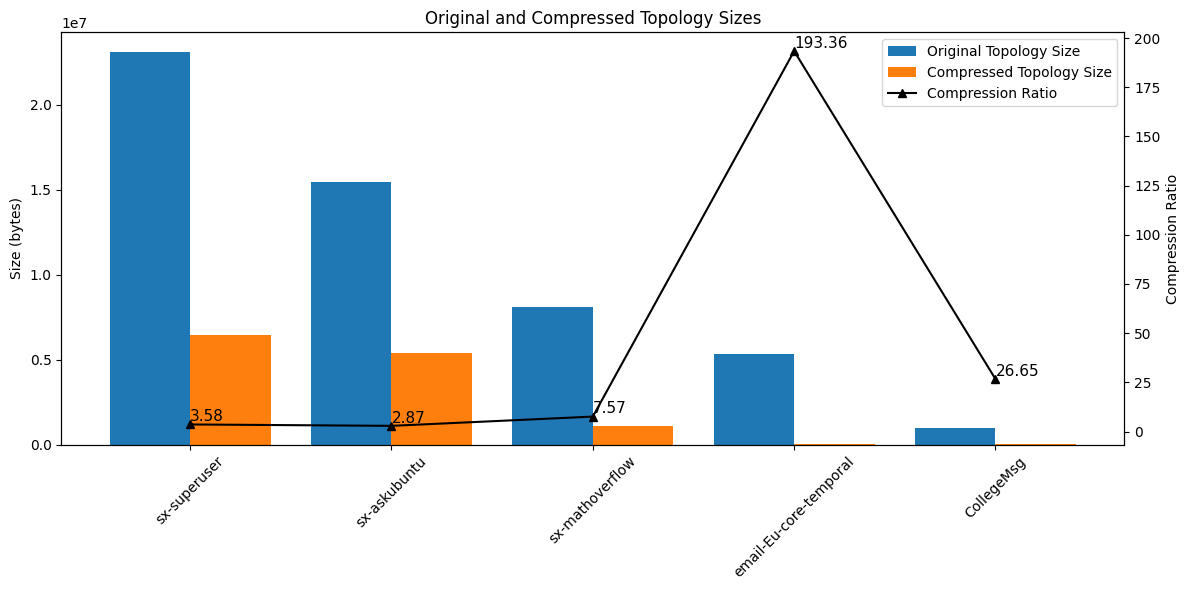

In [121]:
datasets = ['sx-superuser', 'sx-askubuntu', 'sx-mathoverflow', 'email-Eu-core-temporal', 'CollegeMsg']
compression_ratios = [3.5823875050454688, 2.8736949784710206, 7.570942556566285, 193.35796363636365, 26.652561247216035]

original_sizes = [23093424, 15430992, 8104800, 5317344, 957360]
compressed_sizes = [6446378, 5369739, 1070514, 27500, 35920]

# Create an array of indices for the bar positions
indices = np.arange(len(datasets))

# Width of the bars
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart for Original and Compressed Topology Sizes
ax1.bar(indices - bar_width/2, original_sizes, bar_width, label='Original Topology Size')
ax1.bar(indices + bar_width/2, compressed_sizes, bar_width, label='Compressed Topology Size')
ax1.set_title('Original and Compressed Topology Sizes')
ax1.set_xticks(indices)
ax1.set_xticklabels(datasets, rotation=45)
ax1.set_ylabel('Size (bytes)')

# Create a secondary y-axis to plot the ratio
ax2 = ax1.twinx()
ax2.plot(indices, compression_ratios, marker='^', color='black', label='Compression Ratio')
ax2.set_ylabel('Compression Ratio')

# Add compression ratio labels to the plot
for i, ratio in enumerate(compression_ratios):
    ax2.text(i, ratio + 0.1, f"{ratio:.2f}", ha="left", va="bottom", color="black", fontsize=11)

# Adjust legend to avoid overlapping
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=1)

plt.tight_layout()
plt.show()

In [4]:
addr = os.path.join(os.path.abspath('.')+'/dataset', available_datasets[4])
dt = pd.read_csv(addr, header=None, sep = ' ')
dt = dt.rename(columns = {0:'source', 1:'target', 2:'timestamp'})
i= 100000
data = torch.tensor([dt['source'][:1],dt['target'][:1]], dtype=torch.long)
csr = CSR(edge_index=data)
bpt = BPTree(order=5)
a = map(lambda x,y,z : bpt.insert((x,y), z),dt['source'][:1],dt['target'][:1],dt['timestamp'][:1])
list(a)


[None]

In [40]:
from memory_profiler import memory_usage
temp = TimeDataLoaderAndSampler(order=5)
temp.process('CollegeMsg.txt')
start_time = datetime.datetime.now()
n_id, batch_size, adjs = temp.time_sampler([10,10],[1082040961, 1098777142],[72,39,380,101,234,431,455,423,271,219],1)
end_time = datetime.datetime.now()
# print('n_id ---> ',n_id)
# print('batch_size ---> ',batch_size)
# print('adjs ---> ',adjs)
print(f"Execution time: {end_time - start_time} seconds")

This step may consume a little bit time
Done pd.read_csv
Done Graph Compression
Done Creating Index
[942, 30, 1139, 392, 430, 834, 124, 250, 857, 398, 32, 243, 198, 51, 68, 88, 282, 208, 370, 515, 583, 1616, 638, 1039, 969, 642, 220, 1412, 1018, 1778, 32, 52, 1402, 1497, 1026, 128, 132, 1426, 294, 675, 1603, 815, 27, 101, 194, 277, 638, 713, 899, 1644, 32, 124, 321, 719, 1127, 1181, 1594] [10, 0, 0, 10, 10, 2, 0, 10, 8, 7]
[291, 966, 392, 644, 678, 1317, 303, 701, 1792, 942, 193, 34, 198, 51, 515, 370, 100, 1002, 118, 176, 583, 53, 1018, 166, 1136, 1412, 642, 1248, 1312, 391, 32, 52, 464, 1665, 1039, 454, 1426, 277, 294, 315, 343, 1565, 27, 101, 194, 277, 638, 713, 899, 1644, 32, 124, 321, 719, 1127, 1181, 1594, 1118, 1422, 654, 349, 377, 393, 1342, 1314, 646, 650, 1, 31, 72, 103, 132, 161, 162, 679, 1014, 644, 1315, 475, 538, 514, 448, 172, 1054, 998, 306, 372, 164, 323, 857, 44, 58, 63, 297, 475, 277, 536, 866, 1068, 393, 758, 1074, 1130, 1280, 513, 1234, 323, 318, 8, 61, 452, 449, 1

In [18]:
n_id, batch_size, adjs = temp.time_sampler([10,10],[1082040961, 1098777142],[72,39,380,101,234,431,455,423,271,219],1)


TypeError: exceptions must derive from BaseException

In [28]:
dt

,source,target,timestamp
0,1,2,1082040961
1,3,4,1082155839
2,5,2,1082414391
3,6,7,1082439619
4,8,7,1082439756
...,...,...,...
59830,1899,1847,1098776648
59831,1899,1097,1098776836
59832,1899,277,1098777003
59833,1878,1624,1098777111


In [4]:
print('%.5f'% (sum([ 18171.96354 , 18178.17188 ,18185.02341])/3))

18178.38628


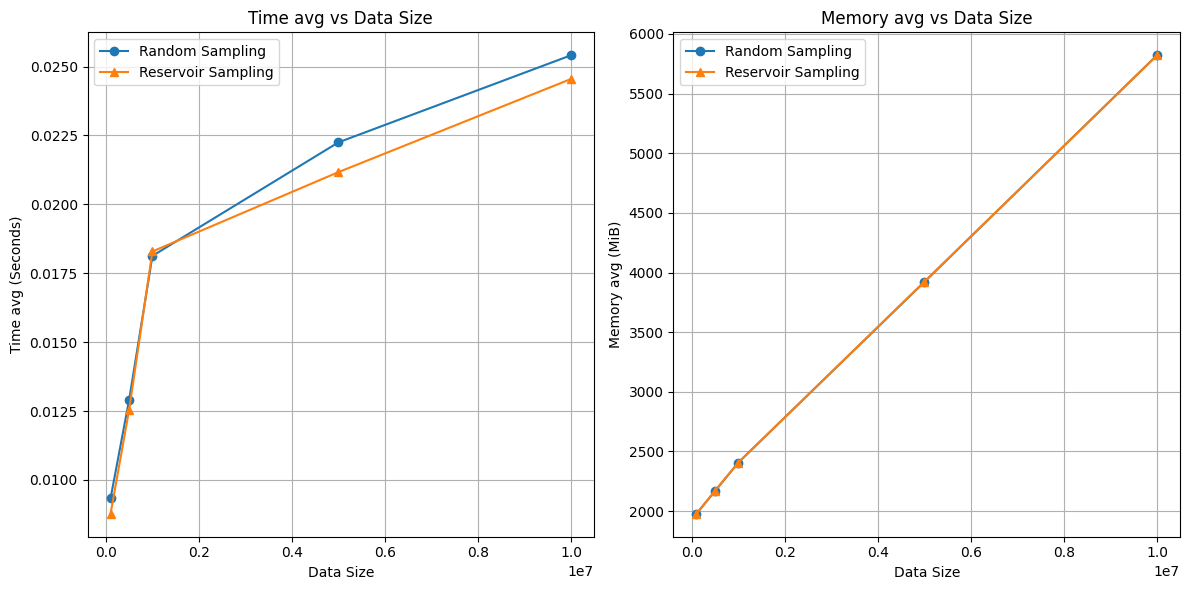

In [62]:
import matplotlib.pyplot as plt
# Data
data_size = [100000, 500000, 1000000, 5000000, 10000000]
time_avg_random = [0.00933, 0.01291, 0.01813, 0.02225, 0.02541]
memory_avg_random = [1978.25912, 2169.00911, 2407.08854, 3921.28646, 5821.04427]
time_avg_reservoir = [0.00877, 0.01255, 0.01829, 0.02117, 0.02455]
memory_avg_reservoir = [1977.50130, 2171.82812, 2407.22005, 3923.32292, 5819.45703]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Time avg
ax1.plot(data_size, time_avg_random, label='Random Sampling', marker='o')
ax1.plot(data_size, time_avg_reservoir, label='Reservoir Sampling', marker='^')
ax1.set_xlabel('Data Size')
ax1.set_ylabel('Time avg (Seconds)')
ax1.set_title('Time avg vs Data Size')
ax1.legend()
ax1.grid()

# Plot Memory avg
ax2.plot(data_size, memory_avg_random, label='Random Sampling', marker='o')
ax2.plot(data_size, memory_avg_reservoir, label='Reservoir Sampling', marker='^')
ax2.set_xlabel('Data Size')
ax2.set_ylabel('Memory avg (MiB)')
ax2.set_title('Memory avg vs Data Size')
ax2.legend()
ax2.grid()

# Show the combined figure
plt.tight_layout()
plt.show()

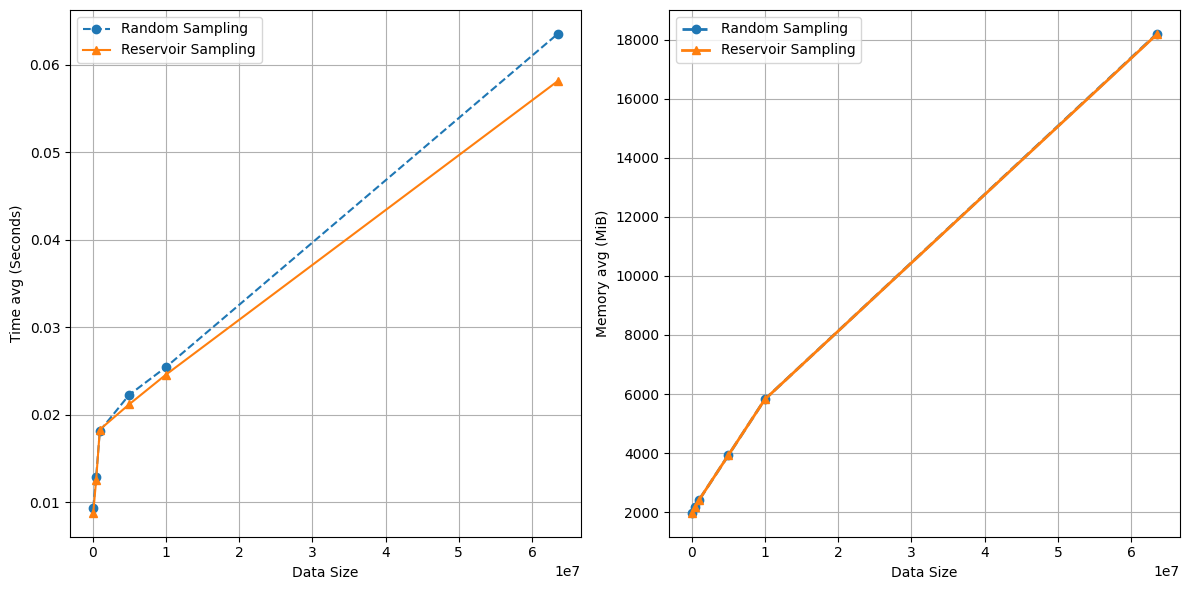

In [5]:
import matplotlib.pyplot as plt

# Data
data_size = [100000, 500000, 1000000, 5000000, 10000000, 63497050]
time_avg_random = [0.00933, 0.01291, 0.01813, 0.02225, 0.02541,0.06353]
memory_avg_random = [1978.25912, 2169.00911, 2407.08854, 3921.28646, 5821.04427,18194.09958]
time_avg_reservoir = [0.00877, 0.01255, 0.01829, 0.02117, 0.02455,0.05813]
memory_avg_reservoir = [1977.50130, 2171.82812, 2407.22005, 3923.32292, 5819.45703,18178.38628]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Time avg
ax1.plot(data_size, time_avg_random, label='Random Sampling', marker='o', linestyle='--')
ax1.plot(data_size, time_avg_reservoir, label='Reservoir Sampling', marker='^', linestyle='-')
ax1.set_xlabel('Data Size')
ax1.set_ylabel('Time avg (Seconds)')
# ax1.set_title('Time avg vs Data Size')
ax1.legend()
ax1.grid()

# Plot Memory avg
ax2.plot(data_size, memory_avg_random, label='Random Sampling', marker='o', linestyle='--', linewidth=2)
ax2.plot(data_size, memory_avg_reservoir, label='Reservoir Sampling', marker='^', linestyle='-', linewidth=2)
ax2.set_xlabel('Data Size')
ax2.set_ylabel('Memory avg (MiB)')
# ax2.set_title('Memory avg vs Data Size')
ax2.legend()
ax2.grid()

# Show the combined figure
plt.tight_layout()
plt.show()